<a href="https://colab.research.google.com/github/yamkas/Mempersiapkan-data-dengan-SQL/blob/master/Mempersiapkan_data_dengan_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Persiapan

In [ ]:
# import library yang dibutuhkan
import sqlite3
import pandas as pd

In [ ]:
# cek versi dari sqlite kita
sqlite3.sqlite_version

'3.37.2'

In [ ]:
# membuat sebuah database kosong bernama test db
conn = sqlite3.connect('test.db')


Kita dapat mengakses database kita dengan 2 cara. Yang pertama secara *native * mengggunakan metode cursor dari library sqlite3, atau dengan menggunakan fungsi dari pandas

## 2. Membuat Tabel

In [ ]:
# buat variabel cursor dari koneksi ke database kita
cursor = conn.cursor()

In [ ]:
# tuliskan query untuk membuat tabel dengan nama users
create_table = """ CREATE TABLE users (
                    id INTEGER PRIMARY KEY,
                    email VARCHAR(255) NOT NULL,
                    user_name VARCHAR(50) NOT NULL,
                    registered_date DATE
                   );
"""

In [ ]:
# mengaplikasikan pembuatan tabel
try:
    cursor.execute(create_table)
    print("Tabel berhasil dibuat!")
except Exception as e:
    print("Terjadi kesalahan")
    print(e)

Tabel berhasil dibuat!


In [ ]:
# mari kita cek tabel kita
query = """
SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite_%';
"""
cursor.execute(query)
cursor.fetchall()

[('users',)]

In [ ]:
# melihat informasi dari tabel yang sudah kita buat
query = """ PRAGMA table_info(users); """
pd.read_sql_query(query, conn)


,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,0,None,1
1,1,user_name,VARCHAR(50),1,None,0
2,2,registered_date,DATE,0,None,0


In [ ]:
query = """ ALTER TABLE users DROP COLUMN email ; """
cursor.execute(query)

In [ ]:
# mari buat tabel lain dengan nama products
create_table2 = """ CREATE TABLE products (
                    product_id INTEGER,
                    product_name VARCHAR(255) NOT NULL,
                    product_category CHAR(50) NOT NULL,
                    price FLOAT DEFAULT 0,
                    description TEXT
                   );
"""

In [ ]:
# mengaplikasikan pembuatan tabel
try:
    cursor.execute(create_table2)
    print("Tabel berhasil dibuat!")
except Exception as e:
    print("Terjadi kesalahan")
    print(e)

In [ ]:
# mari kita cek tabel kita
query = """
SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite_%';
"""
cursor.execute(query)
print(cursor.fetchall())

[('users',), ('products',)]


In [ ]:
query = """ PRAGMA table_info(products); """
pd.read_sql_query(query, conn)

,cid,name,type,notnull,dflt_value,pk
0,0,product_id,INTEGER,0,None,0
1,1,product_name,VARCHAR(255),1,None,0
2,2,product_category,CHAR(50),1,None,0
3,3,price,FLOAT,0,0,0
4,4,description,TEXT,0,None,0


## 3. Modifikasi dan drop tabel

In [ ]:
# mari kita coba buat sebuah tabel baru dengan nama addresses
create_table3 = """ CREATE TABLE addresses (
                    id INTEGER,
                    user_name VARCHAR(50) NOT NULL,
                    address TEXT
                   );
"""

try:
    cursor.execute(create_table3)
    print("Tabel berhasil dibuat!")
except Exception as e:
    print("Terjadi kesalahan")
    print(e)

Tabel berhasil dibuat!


In [ ]:
# ternyata kita perlu mengubah nama kolom id di tabel users menjadi user_id. Mari kita lakukan
query = """ ALTER TABLE users RENAME id to user_id; """
cursor.execute(query)

In [ ]:
# mari cek tabel users kita
query = """ PRAGMA table_info(users); """
pd.read_sql_query(query, conn)

,cid,name,type,notnull,dflt_value,pk
0,0,user_id,INTEGER,0,None,1
1,1,email,VARCHAR(255),1,None,0
2,2,user_name,VARCHAR(50),1,None,0
3,3,registered_date,DATE,0,None,0


In [ ]:
# mari kita tambahkan sebuah kolom baru bernama address ke dalam tabel users
query = """ ALTER TABLE users ADD COLUMN address TEXT ; """
cursor.execute(query)

In [ ]:
# mari cek tabel users kita
query = """ PRAGMA table_info(users); """
pd.read_sql_query(query, conn)

,cid,name,type,notnull,dflt_value,pk
0,0,user_id,INTEGER,0,None,1
1,1,email,VARCHAR(255),1,None,0
2,2,user_name,VARCHAR(50),1,None,0
3,3,registered_date,DATE,0,None,0
4,4,address,TEXT,0,None,0


In [ ]:
# sepertinya kita tidak memerlukan tabel addresses kita lagi. Mari kita drop tabel tersebut
query = """ DROP TABLE addresses ; """
cursor.execute(query)

In [ ]:
# mari kita cek database kita
query = """
SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite_%';
"""
cursor.execute(query)
print(cursor.fetchall())

[('users',), ('products',)]


## 4. Memasukkan dan memanipulasi data

Mari kita isi tabel user kita dengan data berikut

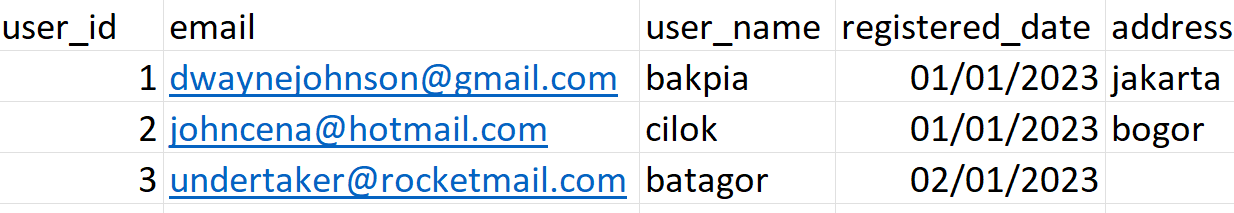

In [ ]:
# mari kita gunakan cara pertama terlebih dahulu untuk memasukkan baris pertama kita
insert_query = """ INSERT INTO users
                  VALUES (1, 'dwaynejohnson@gmail.com', 'bakpia', '2023-01-01', 'jakarta') ;
"""
conn.execute(insert_query)

In [ ]:
# mari kita lihat isi tabel users kita
query_user = """ SELECT * FROM users """
pd.read_sql_query(query_user, conn)

,user_id,email,user_name,registered_date,address
0,1,dwaynejohnson@gmail.com,bakpia,2023-01-01,jakarta


In [ ]:
# mari kita gunakan cara kedua untuk memasukkan baris data berikutnya
insert_query = """ INSERT INTO users(user_id, email, user_name, registered_date, address)
                   VALUES
                    (2, 'johncena@hotmail.com', 'cilok', '2023-01-01', 'bogor'),
                    (3, 'undertaker@rocketmail.com', 'batagor', '2023-01-02', '')
                  ;
"""
conn.execute(insert_query)

In [ ]:
# mari kita lihat isi tabel users kita
query_user = """ SELECT * FROM users """
pd.read_sql_query(query_user, conn)

,user_id,email,user_name,registered_date,address
0,1,dwaynejohnson@gmail.com,bakpia,2023-01-01,jakarta
1,2,johncena@hotmail.com,cilok,2023-01-01,bogor
2,3,undertaker@rocketmail.com,batagor,2023-01-02,


Ternyata kita dihubungi oleh user batagor bahwa dia lupa memasukkan alamatnya. Mari kita update tabel kita dan mengisi alamat dari user batagor yaitu bandung

In [ ]:
update_query = """ UPDATE users SET address='bandung' WHERE address=''
                  ;
"""
conn.execute(update_query)

In [ ]:
# mari kita lihat isi tabel users kita
query_user = """ SELECT * FROM users """
pd.read_sql_query(query_user, conn)

,user_id,email,user_name,registered_date,address
0,1,dwaynejohnson@gmail.com,bakpia,2023-01-01,jakarta
1,2,johncena@hotmail.com,cilok,2023-01-01,bogor
2,3,undertaker@rocketmail.com,batagor,2023-01-02,bandung
3,5,dwaynejohnson@gmail.com,bakpia,2023-01-01,jakarta


In [ ]:
# apa yang akan terjadi kalau kita insert lagi data baris ke 1 kita ?
insert_query = """ INSERT INTO users
                  VALUES (5, 'dwaynejohnson@gmail.com', 'bakpia', '2023-01-01', 'jakarta') ;
"""
conn.execute(insert_query)

user cilok menghubungi kita dan minta kita menghapus datanya dari database kita. Kita bisa menggunakan sintaks DELETE untuk case ini

In [ ]:
#  mari hapus data cilok berdasakan user_id nya
delete_query = """ DELETE FROM users WHERE user_id = 2;
"""
conn.execute(delete_query)

In [ ]:
# mari kita lihat isi tabel users kita
query_user = """ SELECT * FROM users """
pd.read_sql_query(query_user, conn)

,user_id,email,user_name,registered_date,address
0,1,dwaynejohnson@gmail.com,bakpia,2023-01-01,jakarta
1,3,undertaker@rocketmail.com,batagor,2023-01-02,bandung
2,5,dwaynejohnson@gmail.com,bakpia,2023-01-01,jakarta


# 5. Mini Case

### 5.1 Membuat database

Kamu sekarang bekerja sebagai seorang Data Specialist di sebuah perusahaan OTA online di bilanganan Tangerang Selatan. Tugas pertama kamu adalah membangun database untuk produk hotel dari perusahaan. Kamu pun membuat sebuah skema dari database yang akan kamu bangun seperti di bawah ini.

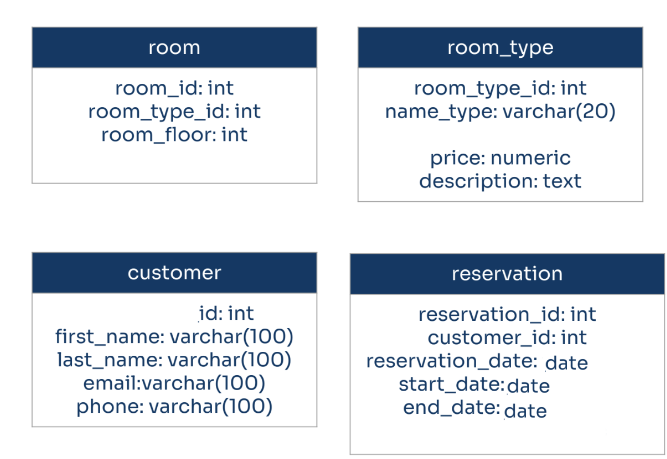

Tugas kamu adalah :

1.   Buat sebuah database baru bernama hotel.db
2.   Buat tabel di dalam database hotel.db ini sesuai dengan diagram di atas. Sesuaikan tipe data untuk tiap field seperti ketentuan. Untuk saat ini abaikan constraint
3. Jangan lupa untuk cek apakah tabel yang kamu buat tipe data dan nama fieldnya sudah sesuai



In [ ]:
#CREATE TABEL ROOM

In [ ]:
conn = sqlite3.connect('hotel.db')


In [ ]:
cursor = conn.cursor()

In [ ]:
create_table_room = """ CREATE TABLE room (
                    room_id INTEGER PRIMARY KEY,
                    room_type_id INTEGER NOT NULL,
                    room_floor INTEGER NOT NULL
                   );
"""

try:
    cursor.execute(create_table_room)
    print("Tabel berhasil dibuat!")
except Exception as e:
    print("Terjadi kesalahan")
    print(e)


Tabel berhasil dibuat!


In [ ]:
query_1 = """
SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite_%';
"""
cursor.execute(query_1)
cursor.fetchall()

[('room',)]

In [ ]:
insert_room = """ INSERT INTO room(room_id, room_type_id, room_floor, availability)
                   VALUES
                    (101, '1', '2', 'TRUE'),
                    (102, '3', '2', 'TRUE'),
                    (103, '1', '2', 'TRUE'),
                    (201, '1', '3', 'TRUE'),
                    (202, '1', '3', 'FALSE'),
                    (203, '3', '3', 'TRUE'),
                    (209, '2', '3', 'FALSE'),
                    (210, '2', '3', 'TRUE')
                  ;
"""
conn.execute(insert_room)

In [ ]:
query_1 = """ PRAGMA table_info(room); """
pd.read_sql_query(query_1, conn)

,cid,name,type,notnull,dflt_value,pk
0,0,room_id,INTEGER,0,None,1
1,1,room_type_id,INTEGER,1,None,0
2,2,room_floor,INTEGER,1,None,0


In [ ]:
query_room = """ SELECT * FROM room """
pd.read_sql_query(query_room, conn)

,room_id,room_type_id,room_floor


In [ ]:
query = """ DROP TABLE room_type ; """
cursor.execute(query)

In [ ]:
#CREATE TABEL ROOM_TYPE

In [ ]:
create_table_room_type = """ CREATE TABLE room_type (
                    room_type_id INTEGER PRIMARY KEY,
                    name_type VARCHAR(20) NOT NULL,
                    price NUMERIC NOT NULL,
                    description TEXT NOT NULL
                   );
"""

try:
    cursor.execute(create_table_room_type)
    print("Tabel berhasil dibuat!")
except Exception as e:
    print("Terjadi kesalahan")
    print(e)

Tabel berhasil dibuat!


In [ ]:
query_1 = """
SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite_%';
"""
cursor.execute(query_1)
cursor.fetchall()

[('room',), ('room_type',), ('customer',)]

In [ ]:
query_1 = """ PRAGMA table_info(room_type); """
pd.read_sql_query(query_1, conn)

,cid,name,type,notnull,dflt_value,pk
0,0,room_type_id,INTEGER,0,None,1
1,1,name_type,VARCHAR(20),1,None,0
2,2,price,NUMERIC,1,None,0
3,3,description,TEXT,1,None,0


In [ ]:
#CREATE TABEL CUSTOMER

In [ ]:
create_table_customer = """ CREATE TABLE customer (
                    id INTEGER PRIMARY KEY,
                    first_name VARCHAR(100) NOT NULL,
                    last_name VARCHAR(100) NOT NULL,
                    email VARCHAR(100) NOT NULL,
                    phone VARCHAR(100) NOT NULL
                   );
"""

try:
    cursor.execute(create_table_customer)
    print("Tabel berhasil dibuat!")
except Exception as e:
    print("Terjadi kesalahan")
    print(e)

Tabel berhasil dibuat!


In [ ]:
query_1 = """ PRAGMA table_info(customer); """
pd.read_sql_query(query_1, conn)

,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,0,None,1
1,1,first_name,VARCHAR(100),1,None,0
2,2,last_name,VARCHAR(100),1,None,0
3,3,email,VARCHAR(100),1,None,0
4,4,phone,VARCHAR(100),1,None,0


In [ ]:
#CREATE TABEL RESERVATION

In [ ]:
create_table_reservation = """ CREATE TABLE reservation (
                    reservation_id INTEGER PRIMARY KEY,
                    customer_id INTEGER NOT NULL,
                    reservation_date DATE NOT NULL,
                    start_date DATE NOT NULL,
                    end_date DATE NOT NULL
                   );
"""

try:
    cursor.execute(create_table_reservation)
    print("Tabel berhasil dibuat!")
except Exception as e:
    print("Terjadi kesalahan")
    print(e)

Tabel berhasil dibuat!


In [ ]:
query_1 = """ PRAGMA table_info(reservation); """
pd.read_sql_query(query_1, conn)

,cid,name,type,notnull,dflt_value,pk
0,0,reservation_id,INTEGER,0,None,1
1,1,customer_id,INTEGER,1,None,0
2,2,reservation_date,DATE,1,None,0
3,3,start_date,DATE,1,None,0
4,4,end_date,DATE,1,None,0


### 5.2 Memodifikasi database

Setelah kamu selesai membangun database untuk perusahaan, ternyata kamu sadar bahwa ada beberapa hal yang perlu kamu rubah dan modifikasi dari tabel-tabel di database kamu. Berikut rinciannya :


1.   Kamu perlu mengubah field **id** di tabel **customer** menjadi **customer_id** agar nama fieldnya lebih intuitif
2.   Berdasarkan saran dari Product Manager kita, kita perlu menambah kolom bernama **max_occupancy** dengan tipe data **INTEGER** di tabel **room_type** untuk menentukan kapasitas maksimum dari tiap kamar
3. Di tabel **reservasi** kita perlu menambahkan kolom **total_price** dengan tipe data **NUMERIC** untuk mengetahui berapa harga dari tiap reservasi
4. Supervisor kita juga turut memberikan input bahwa kita perlu menambahkan kolom **availability** dengan tipe data **BOOLEAN** untuk cek ketersediaan kamar di tabel **room**



In [ ]:
# tulis kode kamu di sini

## 5.3 Memasukkan dan memanipulasi data

Sekarang saatnya kita memasukkan data ! Buka link [berikut ini ](https://drive.google.com/drive/folders/1KCD-X3FVzef-ia9dtc7Z60uph9womkTS?usp=drive_link) untuk membuka folder bernama **data** yang berisi 4 file google sheet untuk masing-masing tabel.
Gunakan informasi di tiap sheet untuk mengisi ke 4 tabel di database kamu sesuai dengan nama tabel dan tiap sheet. Jangan lupa untuk mengecek apakah data kamu sudah berhasil dimasukkan setelah kamu melakukan insert



In [ ]:
# tulis kode kamu di sini

Setelah kamu berhasil memasukkan data, ternyata seorang rekan kerja dari tim Business Development menghubungi kamu. Dia mengabarkan bahwa saat ini nama tipe kamar Premier sudah diganti menjadi Suite, dan dipe kamar Deluxe harganya ternyata berubah menjadi 850 ribu. Buatlah query untuk melakukan perubahan tersebut ke dalam database !

In [ ]:
# tulis kode kamu di sini